# Exploring Urban Mobility: A Comprehensive Analysis of Bike Sharing System Data

Developed by Uma Sivakumar - 834006815

## Introduction

#### Hypothesis

1. Examine how different weather conditions impact bike rentals.
2. Determine if there are differences in bike rentals on working days and non-working days.
3. Investigate the impact of holidays on bike rentals.
4. Is there a discernible impact of temperature on bike rentals.
5. How well those variables predict the bike demands.


#### Business Goals / Objectives:

We are modelling the demand for shared bikes with the available independent variables. It could be used by the management of the bike companies to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

By leveraging the rich dataset provided by bike-sharing systems, the research aims to provide a comprehensive understanding of urban mobility patterns. This knowledge can inform city planning, transportation policies, and infrastructure development, ultimately leading to more sustainable and efficient urban environments. Furthermore, the project's findings may have implications for addressing broader issues related to smart city initiatives and the integration of data-driven solutions into urban planning.

## Data Description

**Source of Information :** Kaggle - https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
    
**Description :** Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

**Attribute Information**

We will be using the day.csv file that have the following fields:

day.csv - bike sharing counts aggregated on daily basis.

1. instant: record index
2. dteday : date
3. season : 
    - 1: springer
    - 2: summer
    - 3: fall
    - 4: winter
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. holiday : weather day is holiday or not
7. weekday : day of the week
7. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
8. weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
9. temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
10. atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
11. hum: Normalized humidity. The values are divided to 100 (max)
12. windspeed: Normalized wind speed. The values are divided to 67 (max)
13. casual: count of casual users
14. registered: count of registered users
15. cnt: count of total rental bikes including both casual and registered

### Reading and Understanding Data set

In [1]:
# Importing libraies required
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import spearmanr

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_regression
from scipy.stats import uniform

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Reading the data set

bikeShare = pd.read_csv("days.csv")
bikeShare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Inspecting the various aspects of the bikeShare dataframe

In [3]:
bikeShare.shape

(731, 16)

The bikeShare dataframe has 730 rows and 10 columns.

In [4]:
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There seem to variables that are categorical in nature but interger or float type.

In [5]:
bikeShare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Data Preprocessing

### Data Quality Check

In [6]:
# Checking for Null Values

bikeShare.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing or NULL values in the data set.

In [7]:
# Checking for unique values

bikeShare.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
# Renaming columns for better readablity 

bikeShare.rename(columns={'yr':'year','mnth':'month','weathersit':'weather_situation','atemp':'temp_feel',
                   'hum':'humidity','cnt':'count'}, inplace=True)

bikeShare.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
season_codes = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bikeShare['season'] = bikeShare['season'].map(season_codes)

bikeShare.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [10]:
month_codes = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
bikeShare['month'] = bikeShare['month'].map(month_codes)

bikeShare.month.head()

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

In [11]:
weekday_codes = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
bikeShare['weekday'] = bikeShare['weekday'].map(weekday_codes)

bikeShare.weekday.head()

0       Sunday
1       Monday
2      Tuesday
3    Wednesday
4     Thursday
Name: weekday, dtype: object

In [12]:
weathersit_codes = {1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}
bikeShare['weather_situation'] = bikeShare['weather_situation'].map(weathersit_codes)

bikeShare.weather_situation.head()

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weather_situation, dtype: object

In [13]:
yr_codes = {0:"2011",1:"2012"}
bikeShare['year'] = bikeShare['year'].map(yr_codes)

bikeShare.year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: object

In [14]:
bikeShare.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,0,Wednesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,0,Thursday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Removing insignificant columns for our hypothesis

Removing insignificant data from the dataset for our regression hypothesis - instant, dteday

In [15]:
# Dropping the above column as it is of no use to us

bikeShare = bikeShare[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_situation', 'temp', 'temp_feel', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
bikeShare.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,count
0,spring,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,spring,2011,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,spring,2011,January,0,Wednesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,spring,2011,January,0,Thursday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             731 non-null    object 
 1   year               731 non-null    object 
 2   month              731 non-null    object 
 3   holiday            731 non-null    int64  
 4   weekday            731 non-null    object 
 5   workingday         731 non-null    int64  
 6   weather_situation  731 non-null    object 
 7   temp               731 non-null    float64
 8   temp_feel          731 non-null    float64
 9   humidity           731 non-null    float64
 10  windspeed          731 non-null    float64
 11  casual             731 non-null    int64  
 12  registered         731 non-null    int64  
 13  count              731 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.1+ KB


### Checking for outliers

In [17]:
bikeShare.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_situation', 'temp', 'temp_feel', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

Analyzing outliers, skewness, and the general distribution shape through the utilization of box plots.

#### Outlier detection and handling for attribute temp

In [18]:
bikeShare.temp.describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

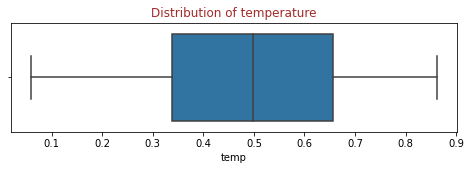

In [19]:
# Plot the boxplot of temp variable.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.temp)
plt.title("Distribution of temperature", fontsize = 12, color = "brown")
plt.show()

There are no outliers in the attribute temp.

#### Outlier detection and handling for attribute temp_feel

In [20]:
bikeShare.temp_feel.describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: temp_feel, dtype: float64

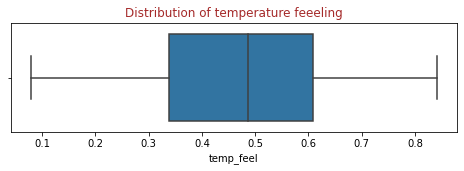

In [21]:
# Plot the boxplot of temp_feel variable.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.temp_feel)
plt.title("Distribution of temperature feeeling", fontsize = 12, color = "brown")
plt.show()

There are no outliers in the attribute temp_feel.

#### Outlier detection and handling for attribute humidity

In [22]:
bikeShare.humidity.describe()

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: humidity, dtype: float64

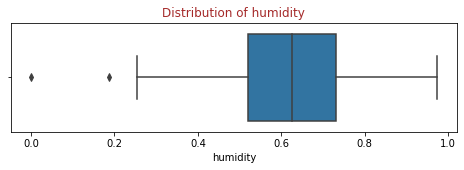

In [23]:
# Plot the boxplot of humidity variable.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.humidity)
plt.title("Distribution of humidity", fontsize = 12, color = "brown")
plt.show()

In [24]:
# Calculate the IQR (Interquartile Range)
Q1 = bikeShare.humidity.quantile(0.25)
Q3 = bikeShare.humidity.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5 * IQR

# Identify and mark outliers
bikeShare['Is_Outlier'] = (bikeShare.humidity < (Q1 - threshold)) | (bikeShare.humidity > (Q3 + threshold))

# Print the outliers
outliers = bikeShare[bikeShare['Is_Outlier']]
print("\033[1mNumber of outliers:\033[0m ", outliers.shape[0])

Number of outliers:  2


In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
bikeShare = bikeShare[(bikeShare.humidity >= lower_bound) & (bikeShare.humidity <= upper_bound)]

In [27]:
bikeShare.drop('Is_Outlier', inplace = True, axis = 1)
bikeShare.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,count
0,spring,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,spring,2011,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,spring,2011,January,0,Wednesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,spring,2011,January,0,Thursday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
# Checking for shape

bikeShare.shape

(729, 14)

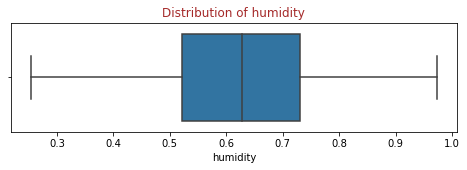

In [29]:
# Plot the boxplot of humidity variable after the removal of outliers.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.humidity)
plt.title("Distribution of humidity", fontsize = 12, color = "brown")
plt.show()

#### Outlier detection and handling for attribute windspeed

In [30]:
bikeShare.windspeed.describe()

count    729.000000
mean       0.189953
std        0.076662
min        0.022392
25%        0.134950
50%        0.180967
75%        0.233204
max        0.441563
Name: windspeed, dtype: float64

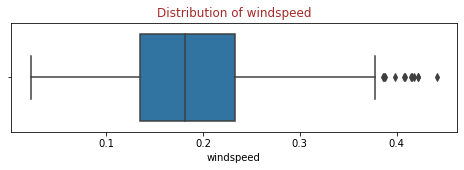

In [31]:
# Plot the boxplot of windspeed variable.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.windspeed)
plt.title("Distribution of windspeed", fontsize = 12, color = "brown")
plt.show()

In [32]:
# Calculate the IQR (Interquartile Range)
Q1 = bikeShare.windspeed.quantile(0.25)
Q3 = bikeShare.windspeed.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5 * IQR

# Identify and mark outliers
bikeShare['Is_Outlier'] = (bikeShare.windspeed < (Q1 - threshold)) | (bikeShare.windspeed > (Q3 + threshold))

# Print the outliers
outliers = bikeShare[bikeShare['Is_Outlier']]
print("\033[1mNumber of outliers:\033[0m ", outliers.shape[0])

Number of outliers:  12


In [33]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [34]:
bikeShare = bikeShare[(bikeShare.windspeed >= lower_bound) & (bikeShare.windspeed <= upper_bound)]

In [35]:
bikeShare.drop('Is_Outlier', inplace = True, axis = 1)
bikeShare.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,count
0,spring,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,spring,2011,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,spring,2011,January,0,Wednesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,spring,2011,January,0,Thursday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
# Checking for shape

bikeShare.shape

(717, 14)

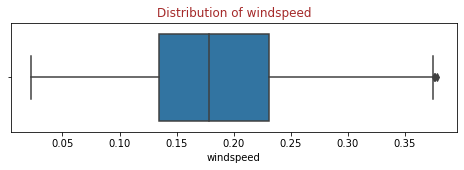

In [37]:
# Plot the boxplot of windspeed variable after the removal of outliers.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.windspeed)
plt.title("Distribution of windspeed", fontsize = 12, color = "brown")
plt.show()

#### Outlier detection and handling for attribute casual

In [38]:
bikeShare.casual.describe()

count     717.000000
mean      856.944212
std       689.273998
min         2.000000
25%       318.000000
50%       727.000000
75%      1120.000000
max      3410.000000
Name: casual, dtype: float64

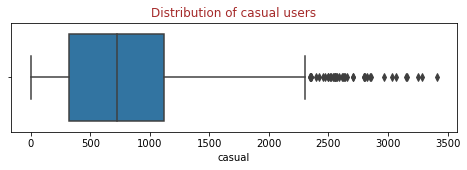

In [39]:
# Plot the boxplot of casual variable.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.casual)
plt.title("Distribution of casual users", fontsize = 12, color = "brown")
plt.show()

In [40]:
# Calculate the IQR (Interquartile Range)
Q1 = bikeShare.casual.quantile(0.25)
Q3 = bikeShare.casual.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5 * IQR

# Identify and mark outliers
bikeShare['Is_Outlier'] = (bikeShare.casual < (Q1 - threshold)) | (bikeShare.casual > (Q3 + threshold))

# Print the outliers
outliers = bikeShare[bikeShare['Is_Outlier']]
print("\033[1mNumber of outliers:\033[0m ", outliers.shape[0])

Number of outliers:  41


In [41]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [42]:
bikeShare = bikeShare[(bikeShare.casual >= lower_bound) & (bikeShare.casual <= upper_bound)]

In [43]:
bikeShare.drop('Is_Outlier', inplace = True, axis = 1)
bikeShare.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,count
0,spring,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,spring,2011,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,spring,2011,January,0,Wednesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,spring,2011,January,0,Thursday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
# Checking for shape

bikeShare.shape

(676, 14)

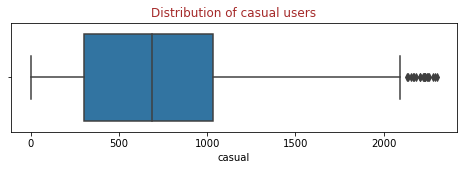

In [45]:
# Plot the boxplot of casual variable.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.casual)
plt.title("Distribution of casual users", fontsize = 12, color = "brown")
plt.show()

#### Outlier detection and handling for attribute registered

In [46]:
bikeShare.registered.describe()

count     676.000000
mean     3628.752959
std      1576.370496
min        20.000000
25%      2481.750000
50%      3615.500000
75%      4696.250000
max      6946.000000
Name: registered, dtype: float64

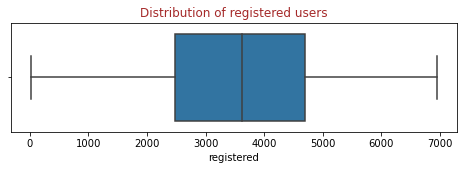

In [47]:
# Plot the boxplot of registered variable.

plt.figure(figsize = [8,2])
sns.boxplot(bikeShare.registered)
plt.title("Distribution of registered users", fontsize = 12, color = "brown")
plt.show()

We can observe that there is no outlier in the variable registered.

### Visualizing the Data

In [48]:
bikeShare.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,windspeed,casual,registered,count
0,spring,2011,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,2011,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,spring,2011,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,spring,2011,January,0,Wednesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,spring,2011,January,0,Thursday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [49]:
# Creating a df for numerical values

num_var = bikeShare[['temp', 'temp_feel', 'humidity', 'windspeed', 'casual', 'registered']]

In [50]:
# Creating a df for categories

cat_var = bikeShare[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_situation', 'count']]

#### Univariate Analysis

##### Examining the skewness and overall distribution of continuous features through the visualization of histograms and kernel density estimation.

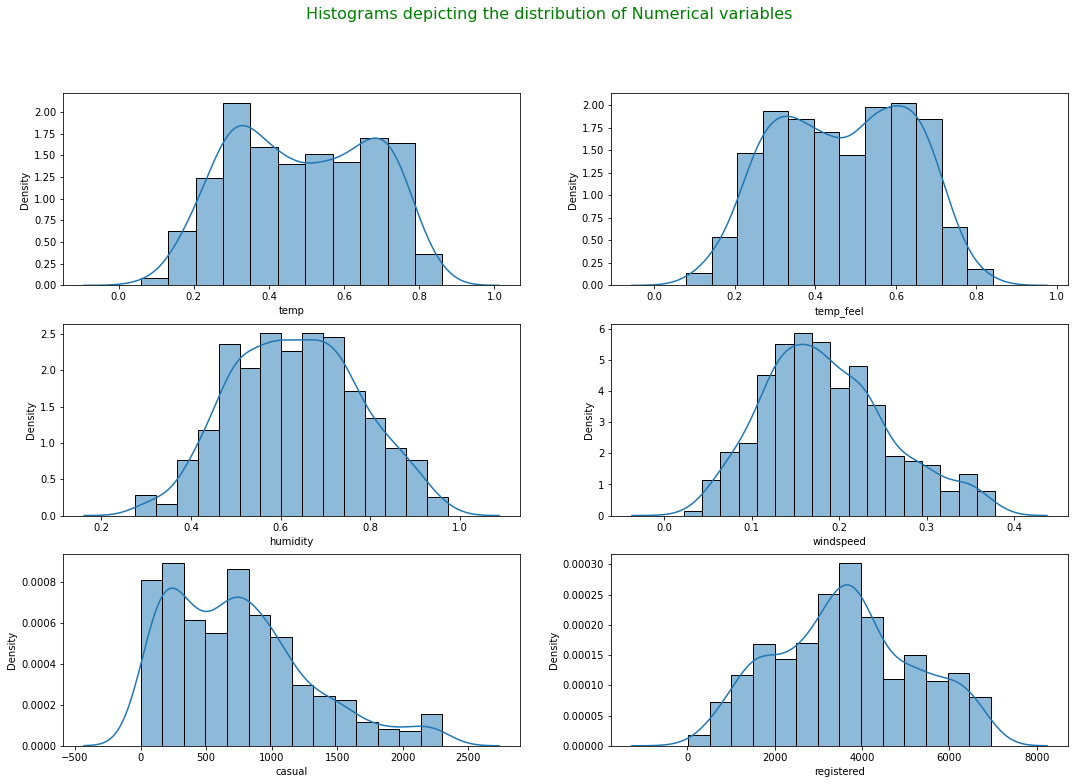

In [51]:
# Exploring numerical columns of the bikeShare dataframe

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

axes = axes.flatten()

for i, col in enumerate(num_var.columns):
    sns.histplot(num_var[col], stat='density', kde=True, kde_kws={"cut": 3}, ax=axes[i])
    
plt.suptitle('Histograms depicting the distribution of Numerical variables', fontsize=16, color='Green')
plt.show()

Observations : 

    1. We can see the distribution of humidity and windspeed is like a normal distribution, increasing it a point then then gradually descreasing.
    2. The distribution of casual users is highly left skewed indicating less number of casual users use the shared bikes compared to the normal distribution of the registered useds.
    3. The graph of temp and temp_feel are similar with an increasing descresing trend.

In [52]:
# Exploring categorical columns of the bikeShare dataframe

for col in cat_var:
    print("\033[1m" + col + "\033[0m")
    print(bikeShare[col].value_counts())
    print("\n")

season
fall      173
spring    171
winter    170
summer    162
Name: season, dtype: int64


year
2011    354
2012    322
Name: year, dtype: int64


month
January      61
December     61
August       60
November     60
July         57
March        56
October      56
May          54
February     53
April        53
June         53
September    52
Name: month, dtype: int64


holiday
0    658
1     18
Name: holiday, dtype: int64


weekday
Wednesday    103
Thursday     102
Saturday     102
Friday       101
Tuesday      100
Monday        89
Sunday        79
Name: weekday, dtype: int64


workingday
1    490
0    186
Name: workingday, dtype: int64


weather_situation
Clear         422
Mist          234
Light Snow     20
Name: weather_situation, dtype: int64


count
7534    2
5119    2
5409    2
5847    2
3068    2
       ..
5058    1
4727    1
4484    1
2710    1
2729    1
Name: count, Length: 648, dtype: int64




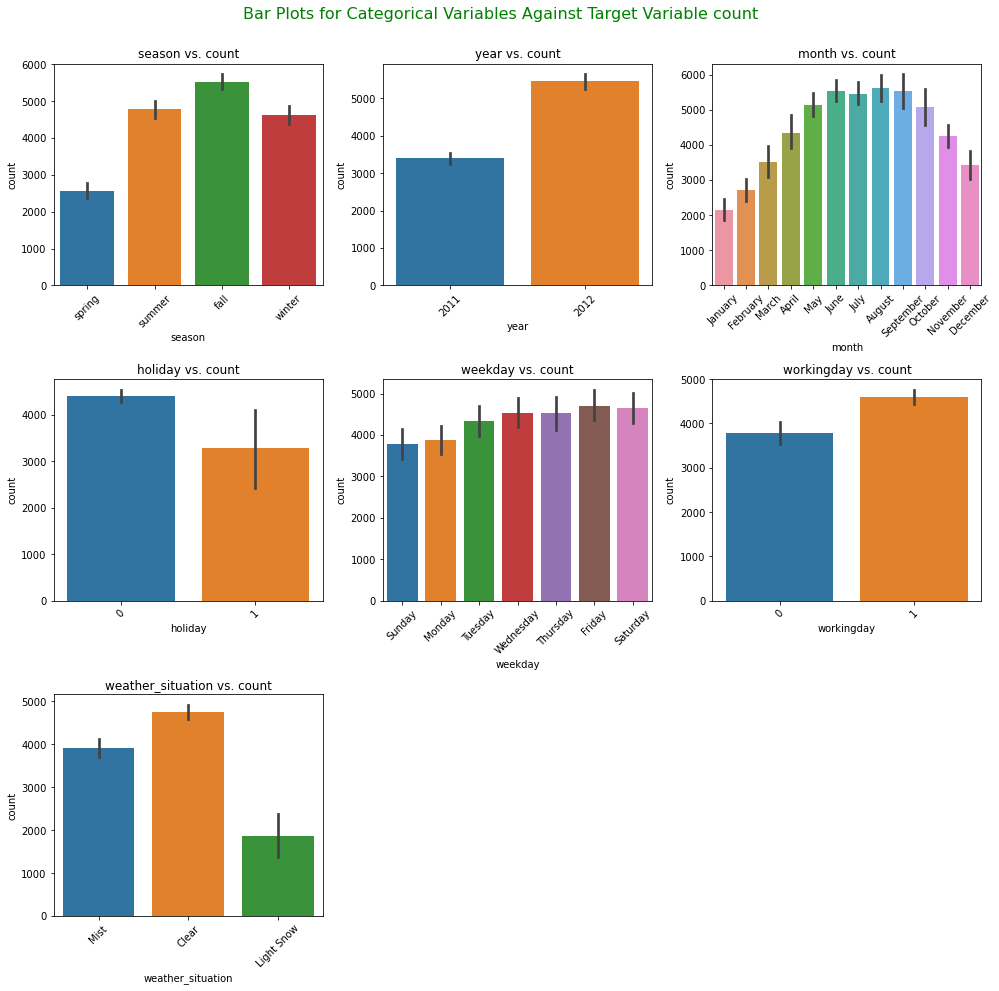

In [53]:
# Plotting the categorical variables

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 14))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each categorical column and create a bar plot
for i, column in enumerate(cat_var):  # Exclude 'cnt'
    sns.barplot(x=column, y='count', data=cat_var, ax=axes[i])
    axes[i].set_title(f'{column} vs. count')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the empty subplot (if any)
if len(cat_var.columns[:-1]) < len(axes.flat):
    for j in range(len(cat_var.columns[:-1]), len(axes.flat)):
        fig.delaxes(axes.flatten()[j])
        
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Bar Plots for Categorical Variables Against Target Variable count', fontsize=16, color="Green")
plt.show()

Observations : 
    
    1. Most usage of the shared bikes happens during Fall season. This could be due to a variety of reasons such as school and university openings, coporate appraisals and more travel to office.
    2. Clearly in 2012, there has a been a drastic increase in the demand for shared bikes, this could constitute to a positive polutionless environment.
    3. We can also see more usage of shared bike on Fridays and Saturdays of the Week.
    4. Bikes are used moslty during clear weather but a more suprising discovery is people use shared bikes even during Mist and Light Snow.

#### Bivariate Analysis

###### Visualizing the relationship between features and the target variable while considering the distinction based on weather situation.

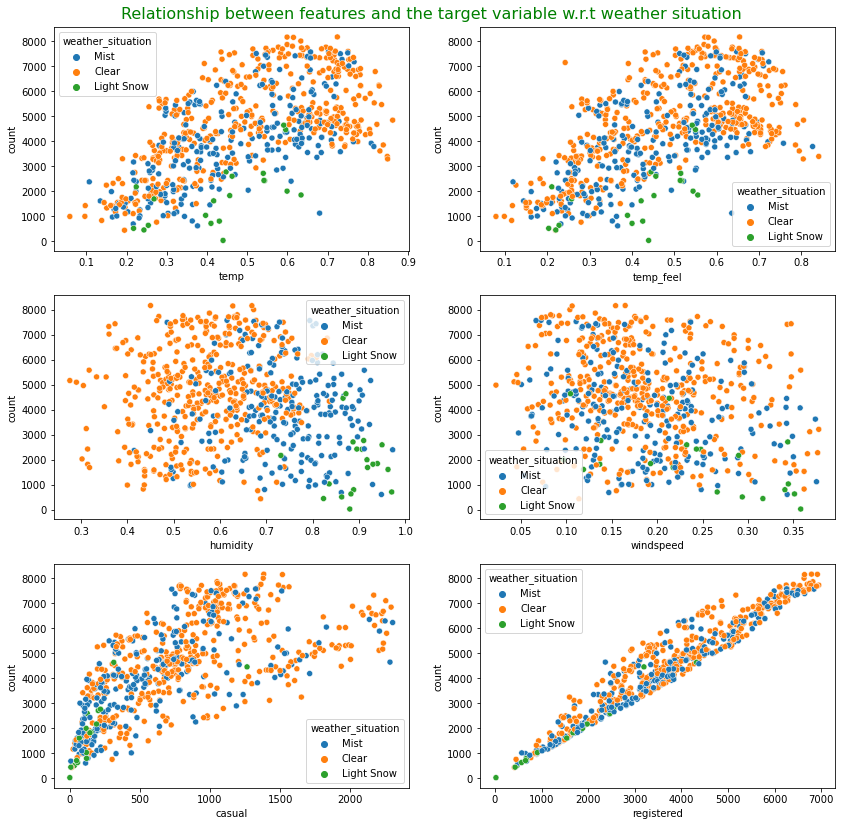

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()

for i, col in enumerate(num_var.columns):
    sns.scatterplot(data=bikeShare,x=col,y='count',hue = bikeShare['weather_situation'], ax=axes[i])

plt.suptitle('Relationship between features and the target variable w.r.t weather situation', fontsize=16, color="Green", y=0.9)
plt.show()

Observations :

    1. We can see a clear increase in the usuage of bikes during clear weather by both registered and casual users, Registered users being highly positively correalted.
    2. We can also see that irrespective of the temperature people are using the bikes. But heavily concentrated during mild to medium temperatures.

##### Visualizing the relationship between features and the target variable while considering the distinction based on working days.

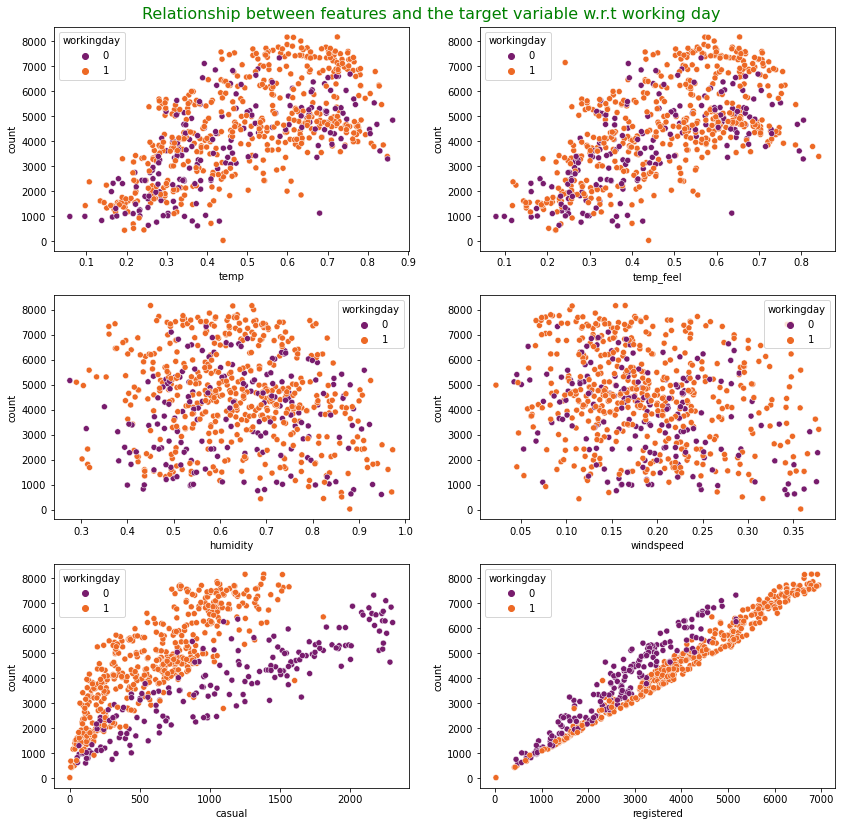

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()

for i, col in enumerate(num_var.columns):
    sns.scatterplot(data=bikeShare,x=col,y='count',hue = bikeShare['workingday'], ax=axes[i], palette='inferno')
   
plt.suptitle('Relationship between features and the target variable w.r.t working day', fontsize=16, color="Green", y=0.9)
plt.show()

Observations : Bikes used on working days is heavily dominating the non-working days.

##### Visualizing the relationship between features and the target variable while considering the data for the years 2011 and 2012.

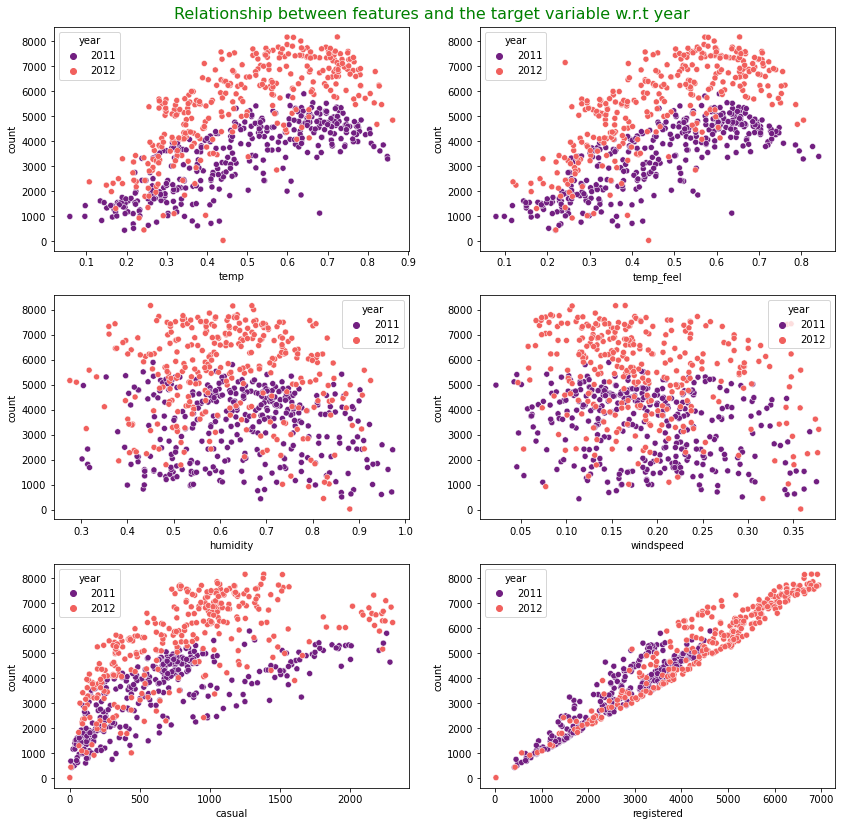

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()

for i, col in enumerate(num_var.columns):
    sns.scatterplot(data=bikeShare,x=col,y='count',hue = bikeShare['year'], ax=axes[i], palette='magma')
    
plt.suptitle('Relationship between features and the target variable w.r.t year', fontsize=16, color="Green", y=0.9)
plt.show()

Observations : The demand has started to increase from year 2011 to 2012.

#### Multivariate Analysis

##### Plotting pairplot to find corelation between features.

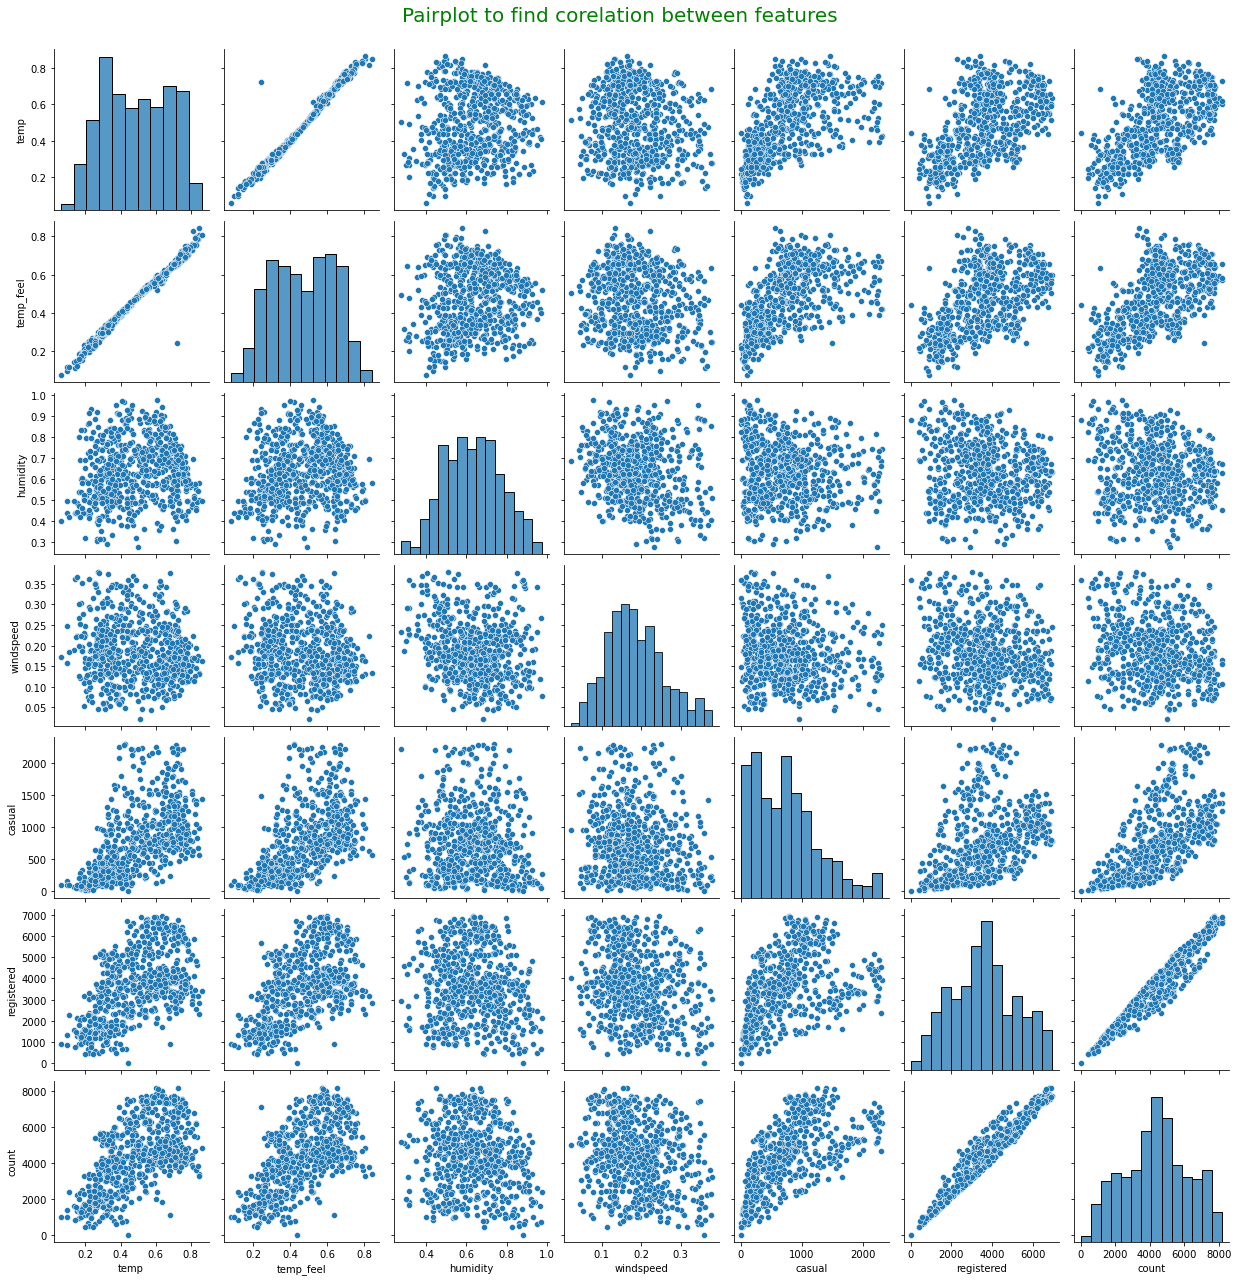

In [57]:
# Visualizing numerical variables - pairplot

num_var1 = bikeShare[['temp', 'temp_feel', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

sns.pairplot(num_var1)
plt.suptitle('Pairplot to find corelation between features', fontsize=20, color="Green", y=1.02)
plt.show()

Observations:
1. temp_feel and temp have a high linear correlation.
2. temp and casual seem to have some positive correlation with less slope.
3. temp and registered also seem to have some positive correlation with slightly a higher slope than casual and temp.
4. casual and registered seem to have a +ve slight correlation
5. causal and windspeed seem to have some negative correaltion. 

##### Plotting heatmap to find corelation between features.

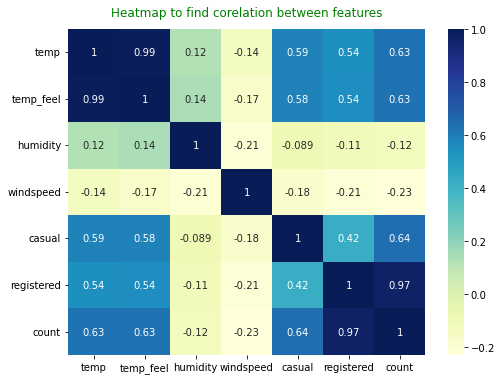

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (8, 6))
sns.heatmap(num_var1.corr(), annot = True, cmap="YlGnBu")
plt.title('Heatmap to find corelation between features', fontsize=12, color="Green", y=1.02)
plt.show()

The strong correlation of 0.99 between 'temp' and 'temp_feel' indicates a high degree of multi-colinearity. Therefore, we are dropping 'temp_feel' from the dataset.

In [59]:
# Removing temp_feel.

bikeShare.drop(['temp_feel'],axis=1,inplace=True)

In [60]:
bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 730
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             676 non-null    object 
 1   year               676 non-null    object 
 2   month              676 non-null    object 
 3   holiday            676 non-null    int64  
 4   weekday            676 non-null    object 
 5   workingday         676 non-null    int64  
 6   weather_situation  676 non-null    object 
 7   temp               676 non-null    float64
 8   humidity           676 non-null    float64
 9   windspeed          676 non-null    float64
 10  casual             676 non-null    int64  
 11  registered         676 non-null    int64  
 12  count              676 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 90.1+ KB


In [61]:
bikeShare.shape

(676, 13)

In [62]:
bikeShare.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,casual,registered,count
0,spring,2011,January,0,Sunday,0,Mist,0.344167,0.805833,0.160446,331,654,985
1,spring,2011,January,0,Monday,0,Mist,0.363478,0.696087,0.248539,131,670,801
2,spring,2011,January,0,Tuesday,1,Clear,0.196364,0.437273,0.248309,120,1229,1349
3,spring,2011,January,0,Wednesday,1,Clear,0.200000,0.590435,0.160296,108,1454,1562
4,spring,2011,January,0,Thursday,1,Clear,0.226957,0.436957,0.186900,82,1518,1600


### Statistical Modelling

**Hypothesis-2**

Weather Impact Hypothesis:
   - Null Hypothesis: Weather conditions have no significant impact on bike rentals.
   - Alternative Hypothesis: Different weather conditions affect bike rentals differently.

ANOVA Statistic: 37.28579131637689
P-value: 4.3944772386254653e-16
Reject the null hypothesis: Different weather conditions affect bike rentals differently.


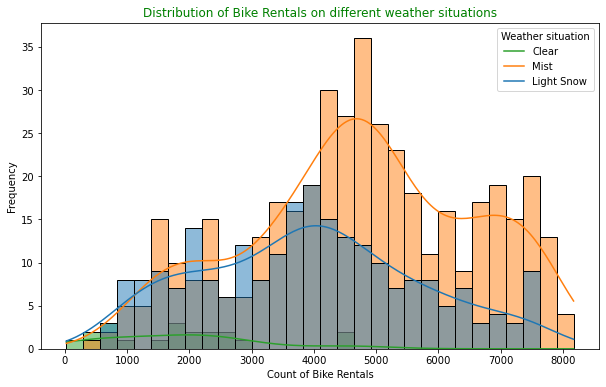

In [63]:
# Split data into four groups based on weather conditions
group_clear = bikeShare[bikeShare['weather_situation'] == 'Clear']['count']
group_mist = bikeShare[bikeShare['weather_situation'] == 'Mist']['count']
group_light_snow = bikeShare[bikeShare['weather_situation'] == 'Light Snow']['count']

# Perform one-way ANOVA
statistic, p_value = f_oneway(group_clear, group_mist, group_light_snow)

# Define significance level
alpha = 0.05

# Print the results
print(f'\033[1mANOVA Statistic:\033[0m {statistic}')
print(f'\033[1mP-value:\033[0m {p_value}')

# Compare p-value with significance level
if p_value < alpha:
    print('\033[1mReject the null hypothesis: Different weather conditions affect bike rentals differently.\033[0m')
else:
    print('\033[1mFail to reject the null hypothesis: No significant impact of weather conditions on bike rentals.\033[0m')
    
    
# Visualize the distribution of rentals on working and non-working days
plt.figure(figsize=(10, 6))
sns.histplot(data=bikeShare, x='count', hue='weather_situation', bins=30, kde=True)
plt.title('Distribution of Bike Rentals on different weather situations', color='green')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.legend(title='Weather situation', labels=['Clear', 'Mist', 'Light Snow'])
plt.show()

**Hypothesis-3**

Working Day Influence Hypothesis:
   - Null Hypothesis: Working days and non-working days have no difference in bike rentals.
   - Alternative Hypothesis: The number of bike rentals varies significantly between working days and non-working days

T-test Statistic: 5.180657053085141
P-value: 2.9241725182108716e-07
Reject the null hypothesis: There are significant differences in bike rentals between working and non-working days.


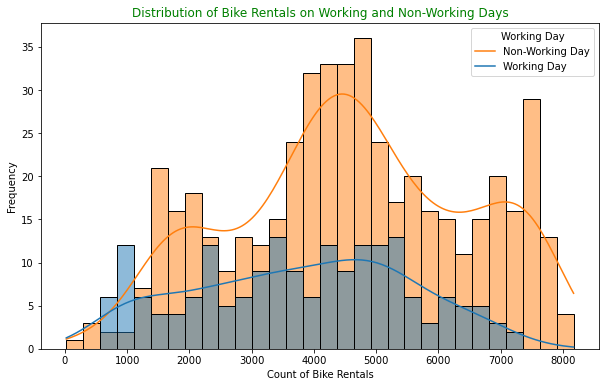

In [64]:
# Split data into two groups: working days and non-working days
working_days = bikeShare[bikeShare['workingday'] == 1]['count']
non_working_days = bikeShare[bikeShare['workingday'] == 0]['count']

# Perform independent t-test
statistic, p_value = ttest_ind(working_days, non_working_days)

# Define significance level
alpha = 0.05

# Print the results
print(f'\033[1mT-test Statistic:\033[0m {statistic}')
print(f'\033[1mP-value:\033[0m {p_value}')

# Compare p-value with significance level
if p_value < alpha:
    print('\033[1mReject the null hypothesis: There are significant differences in bike rentals between working and non-working days.\033[0m')
else:
    print('\033[1mFail to reject the null hypothesis: \033[1mNo significant differences in bike rentals between working and non-working days.\033[0m')

    
# Visualize the distribution of rentals on working and non-working days
plt.figure(figsize=(10, 6))
sns.histplot(data=bikeShare, x='count', hue='workingday', bins=30, kde=True)
plt.title('Distribution of Bike Rentals on Working and Non-Working Days', color='green')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.legend(title='Working Day', labels=['Non-Working Day', 'Working Day'])
plt.show()

**Hypothesis-4**

Holiday Effect Hypothesis:

   - Null Hypothesis: Holidays do not impact bike rentals.
   - Alternative Hypothesis: Bike rentals experience a change in demand during holidays.

T-test Statistic: -2.548975210582878
P-value: 0.011024481664788931
Reject the null hypothesis: There are significant differences in bike rentals between holidays and regular days.


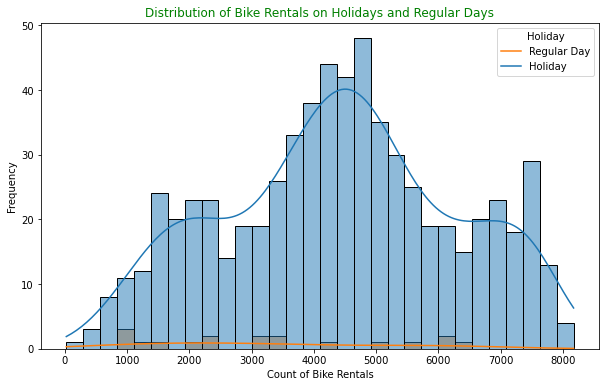

In [65]:
# Split data into two groups: holidays and regular days
holidays = bikeShare[bikeShare['holiday'] == 1]['count']
regular_days = bikeShare[bikeShare['holiday'] == 0]['count']

# Perform independent t-test
statistic, p_value = ttest_ind(holidays, regular_days)

# Define significance level
alpha = 0.05

# Print the results
print(f'\033[1mT-test Statistic:\033[0m {statistic}')
print(f'\033[1mP-value:\033[0m {p_value}')

# Compare p-value with significance level
if p_value < alpha:
    print('\033[1mReject the null hypothesis: There are significant differences in bike rentals between holidays and regular days.\033[0m')
else:
    print('\033[1mFail to reject the null hypothesis: No significant differences in bike rentals between holidays and regular days.\033[0m')

# Visualize the distribution of rentals on holidays and regular days
plt.figure(figsize=(10, 6))
sns.histplot(data=bikeShare, x='count', hue='holiday', bins=30, kde=True)
plt.title('Distribution of Bike Rentals on Holidays and Regular Days', color='green')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.legend(title='Holiday', labels=['Regular Day', 'Holiday'])
plt.show()

**Hypothesis-5**

Temperature Impact Hypothesis:

   - Null Hypothesis: Temperature has no effect on bike rentals.
   - Alternative Hypothesis: Bike rentals are influenced by temperature, with specific temperature ranges associated with higher or lower demand.


Spearman's Rank Correlation: 0.6242946085082584
P-value: 2.5625998693491856e-74
Reject the null hypothesis: There is a significant correlation between temperature and bike rentals.


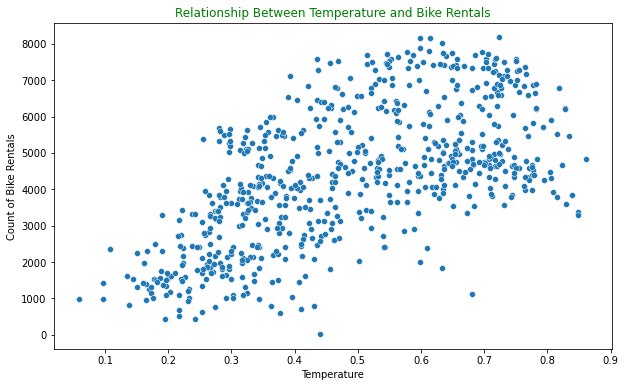

In [66]:
# Test the correlation between temperature and bike rentals using Spearman's rank correlation
correlation, p_value = spearmanr(bikeShare['temp'], bikeShare['count'])

# Define significance level
alpha = 0.05

# Print the results
print(f'\033[1mSpearman\'s Rank Correlation:\033[0m {correlation}')
print(f'\033[1mP-value:\033[0m {p_value}')

# Compare p-value with significance level
if p_value < alpha:
    print('\033[1mReject the null hypothesis: There is a significant correlation between temperature and bike rentals.\033[0m')
else:
    print('\033[1mFail to reject the null hypothesis: No significant correlation between temperature and bike rentals.\033[0m')

# Visualize the relationship between temperature and bike rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bikeShare, x='temp', y='count')
plt.title('Relationship Between Temperature and Bike Rentals', color='green')
plt.xlabel('Temperature')
plt.ylabel('Count of Bike Rentals')
plt.show()

### Dummy Variables

creating dummy variables for the categorical variables - season, mnth, weekday, weathersit

We can achieve this by using the get_dummies function.

In [67]:
# Creating dummies

status = pd.get_dummies(bikeShare[['season', 'year', 'month', 'weekday', 'weather_situation']], drop_first=True)
status.head()

,season_spring,season_summer,season_winter,year_2012,month_August,month_December,month_February,month_January,month_July,month_June,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_situation_Light Snow,weather_situation_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
# check for info

status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 730
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   season_spring                 676 non-null    uint8
 1   season_summer                 676 non-null    uint8
 2   season_winter                 676 non-null    uint8
 3   year_2012                     676 non-null    uint8
 4   month_August                  676 non-null    uint8
 5   month_December                676 non-null    uint8
 6   month_February                676 non-null    uint8
 7   month_January                 676 non-null    uint8
 8   month_July                    676 non-null    uint8
 9   month_June                    676 non-null    uint8
 10  month_March                   676 non-null    uint8
 11  month_May                     676 non-null    uint8
 12  month_November                676 non-null    uint8
 13  month_October                 676 n

In [69]:
# checking shape of the dummies created dataframe - status

status.shape

(676, 23)

In [70]:
# concat the status dataframe created with our bikeShare_new dataframe

bikeShare_new = pd.concat([bikeShare, status], axis = 1)

In [71]:
# Checking the concatinated dataframe

bikeShare_new.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_situation_Light Snow,weather_situation_Mist
0,spring,2011,January,0,Sunday,0,Mist,0.344167,0.805833,0.160446,...,0,0,0,0,1,0,0,0,0,1
1,spring,2011,January,0,Monday,0,Mist,0.363478,0.696087,0.248539,...,0,0,1,0,0,0,0,0,0,1
2,spring,2011,January,0,Tuesday,1,Clear,0.196364,0.437273,0.248309,...,0,0,0,0,0,0,1,0,0,0
3,spring,2011,January,0,Wednesday,1,Clear,0.200000,0.590435,0.160296,...,0,0,0,0,0,0,0,1,0,0
4,spring,2011,January,0,Thursday,1,Clear,0.226957,0.436957,0.186900,...,0,0,0,0,0,1,0,0,0,0


In [72]:
# Drop 'season', 'mnth', 'weekday', 'weathersit' as we have created the dummies for it

drop_cols = ['season', 'year', 'month', 'weekday', 'weather_situation']
bikeShare_new.drop(drop_cols, axis = 1, inplace = True)

In [73]:
bikeShare_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 730
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   holiday                       676 non-null    int64  
 1   workingday                    676 non-null    int64  
 2   temp                          676 non-null    float64
 3   humidity                      676 non-null    float64
 4   windspeed                     676 non-null    float64
 5   casual                        676 non-null    int64  
 6   registered                    676 non-null    int64  
 7   count                         676 non-null    int64  
 8   season_spring                 676 non-null    uint8  
 9   season_summer                 676 non-null    uint8  
 10  season_winter                 676 non-null    uint8  
 11  year_2012                     676 non-null    uint8  
 12  month_August                  676 non-null    uint8  
 13  month

In [74]:
bikeShare_new.head()

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,season_spring,season_summer,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_situation_Light Snow,weather_situation_Mist
0,0,0,0.344167,0.805833,0.160446,331,654,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0.363478,0.696087,0.248539,131,670,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0.196364,0.437273,0.248309,120,1229,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0.200000,0.590435,0.160296,108,1454,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0.226957,0.436957,0.186900,82,1518,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


## Methodology, Model Evaluation and Selection

#### Hypothesis - 5

Splitting the data to Train and Test in a 70:30 ratio

In [75]:
from sklearn.model_selection import train_test_split

# We specify random_state so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikeShare_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 643 to 559
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   holiday                       473 non-null    int64  
 1   workingday                    473 non-null    int64  
 2   temp                          473 non-null    float64
 3   humidity                      473 non-null    float64
 4   windspeed                     473 non-null    float64
 5   casual                        473 non-null    int64  
 6   registered                    473 non-null    int64  
 7   count                         473 non-null    int64  
 8   season_spring                 473 non-null    uint8  
 9   season_summer                 473 non-null    uint8  
 10  season_winter                 473 non-null    uint8  
 11  year_2012                     473 non-null    uint8  
 12  month_August                  473 non-null    uint8  
 13  mon

In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 138 to 15
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   holiday                       203 non-null    int64  
 1   workingday                    203 non-null    int64  
 2   temp                          203 non-null    float64
 3   humidity                      203 non-null    float64
 4   windspeed                     203 non-null    float64
 5   casual                        203 non-null    int64  
 6   registered                    203 non-null    int64  
 7   count                         203 non-null    int64  
 8   season_spring                 203 non-null    uint8  
 9   season_summer                 203 non-null    uint8  
 10  season_winter                 203 non-null    uint8  
 11  year_2012                     203 non-null    uint8  
 12  month_August                  203 non-null    uint8  
 13  mont

### Rescaling

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:
1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Here, I have used MinMax scaling

In [78]:
scaler = MinMaxScaler()

In [79]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'humidity', 'windspeed', 'casual', 'registered']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [80]:
df_train.head()

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,season_spring,season_summer,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_situation_Light Snow,weather_situation_Mist
643,0,1,0.692641,0.504785,0.236850,0.660675,0.957391,8156,0,0,...,1,0,0,1,0,0,0,0,0,0
279,0,1,0.562844,0.586125,0.000000,0.412100,0.556837,4985,0,0,...,1,0,0,1,0,0,0,0,0,0
465,0,1,0.482890,0.228469,0.640329,0.355107,0.720351,5918,0,1,...,0,0,0,0,0,0,0,1,0,0
659,0,0,0.504695,0.336125,0.405277,0.930732,0.657745,6824,0,0,...,1,0,1,0,0,0,0,0,0,0
132,0,1,0.564921,0.843301,0.443843,0.299430,0.461006,4105,0,1,...,0,0,0,1,0,0,0,0,0,1


In [81]:
df_test.head()

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,season_spring,season_summer,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_situation_Light Snow,weather_situation_Mist
138,0,1,0.587765,0.794856,0.242105,0.318281,0.526688,4575,0,1,...,0,0,0,0,0,0,0,0,0,1
571,0,1,0.828668,0.250000,0.401739,0.602367,0.980465,8173,0,0,...,0,0,0,0,0,1,0,0,0,0
50,0,0,0.281715,0.189464,0.566587,0.276195,0.116444,1812,1,0,...,0,0,1,0,0,0,0,0,0,0
604,0,1,0.802708,0.652513,0.299993,0.429636,0.847870,6917,0,0,...,0,0,0,0,0,0,1,0,0,0
688,0,1,0.400857,0.498804,0.599965,0.192898,0.712813,5499,0,0,...,0,0,0,0,0,0,1,0,0,1


In [82]:
df_train.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,season_spring,season_summer,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_situation_Light Snow,weather_situation_Mist
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,0.027484,0.714588,0.527702,0.513592,0.450551,0.330189,0.493586,4386.964059,0.249471,0.241015,...,0.080338,0.082452,0.137421,0.175476,0.120507,0.143763,0.128964,0.152220,0.021142,0.344609
std,0.163662,0.452089,0.232093,0.200019,0.201415,0.240603,0.243596,1882.637103,0.433165,0.428152,...,0.272104,0.275344,0.344655,0.380776,0.325899,0.351221,0.335515,0.359614,0.144009,0.475744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.330249,0.366627,0.308775,0.123192,0.317797,3068.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.509887,0.509569,0.424556,0.300745,0.491924,4458.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.657297,0.575445,0.457256,0.666667,5728.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8167.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


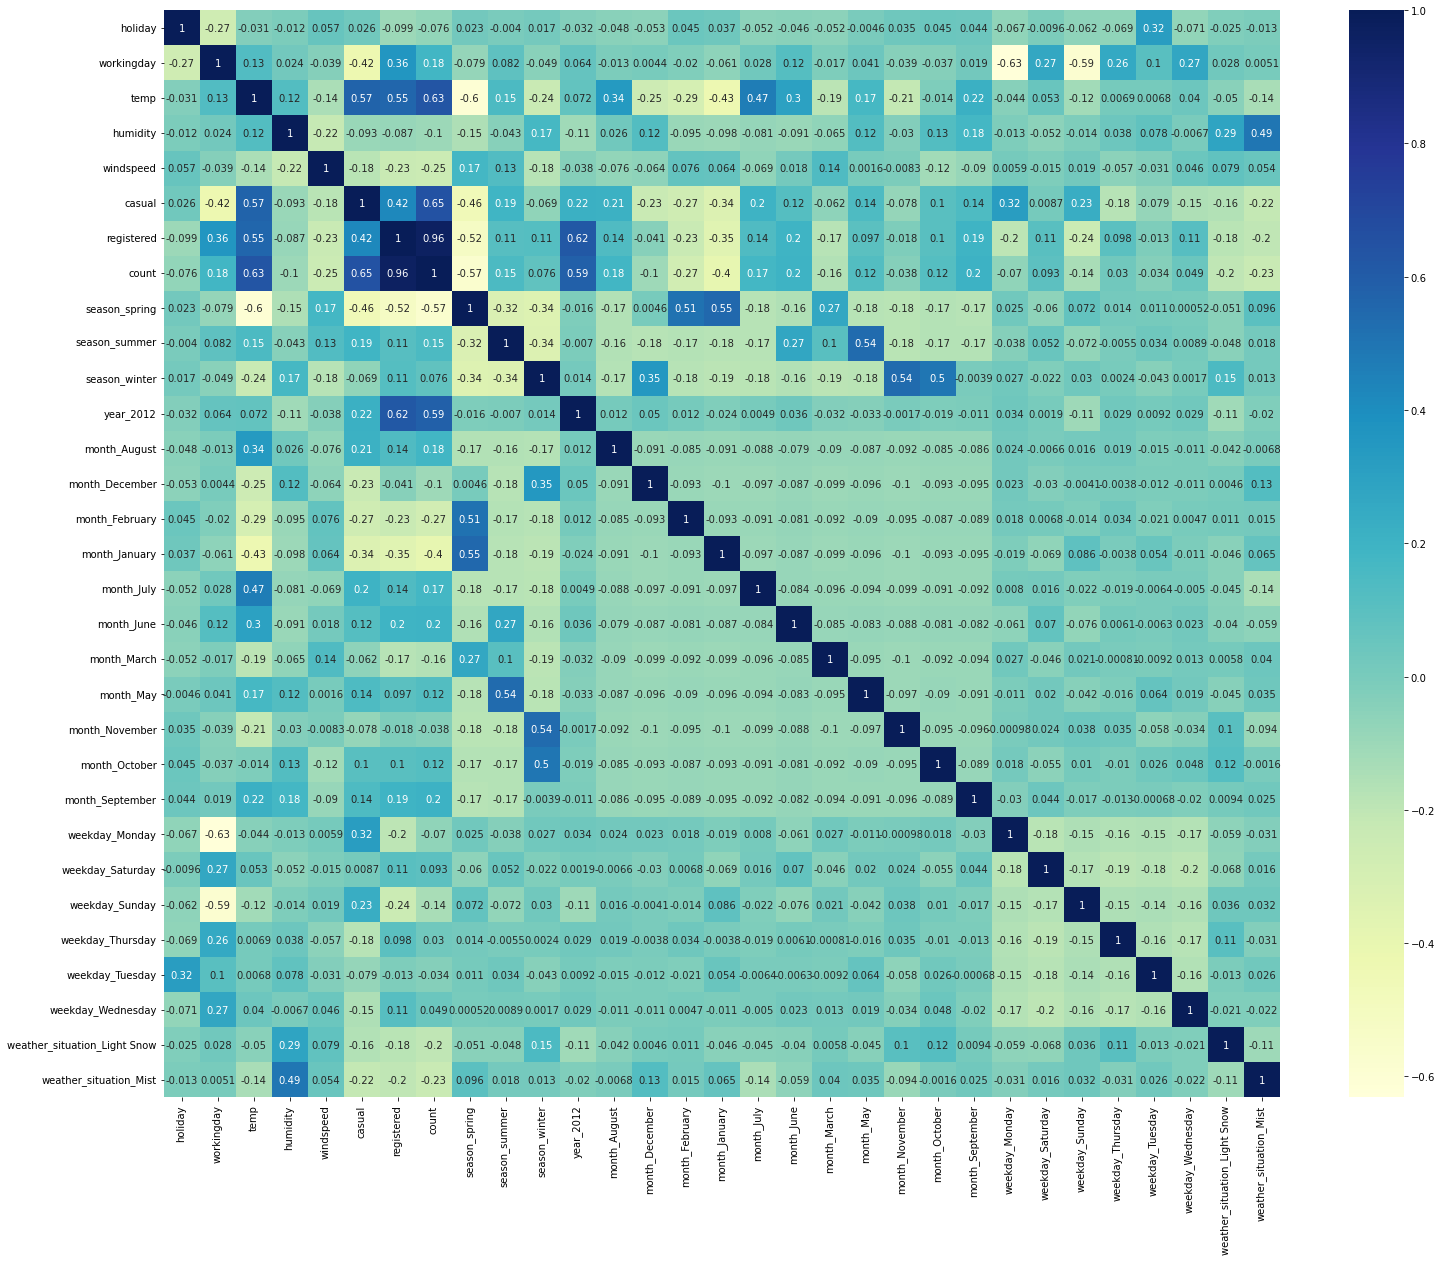

In [83]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observations : 
1. There is high correlation between yr and cnt, temp and cnt, temp and atemp.
2. But we can also see that temp and atemp have a very high correlation, which shows a sign of multicolinearity with the target variable cnt. 

## Training, Fitting, and Evaluating Models

Dividing into X and Y sets for the model building

In [84]:
X_train = df_train.drop('count', axis=1)
y_train = df_train['count']

X_test = df_test.drop('count', axis=1)
y_test = df_test['count']

In [85]:
# Linear Regression

# Create a Regression Model instances and fitting the model on the training data

# Linear Regression Model
print("\033[1mLinear Regression Model\033[0m")
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_linear = lr.predict(X_test)
print('Predicted Linear Regression values are ', y_pred_linear[1:5]) 

mse = mean_squared_error(y_test,y_pred_linear)
print(f"Mean Squared Error: {mse}")
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")
mae = mean_absolute_error(y_test,y_pred_linear)
print(f"Mean Absolute Error: {mae}")
r2score=r2_score(y_test,y_pred_linear)
print(f"R^2 Score: {r2score}")


print("\n")
# Lasso Regression Model
print("\033[1mLasso Regression Model\033[0m")
lasso = Lasso(alpha=0.5)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)
print('Predicted Lasso Regression values are ', y_pred_lasso[1:5])

mse = mean_squared_error(y_test,y_pred_lasso)
print(f"Mean Squared Error: {mse}")
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")
mae = mean_absolute_error(y_test,y_pred_lasso)
print(f"Mean Absolute Error: {mae}")
r2score=r2_score(y_test,y_pred_lasso)
print(f"R^2 Score: {r2score}")


print("\n")
# Ridge Regression Model
print("\033[1mRidge Regression Model\033[0m")
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
print('Predicted Ridge Regression values are ', y_pred_ridge[1:5])

mse = mean_squared_error(y_test,y_pred_ridge)
print(f"Mean Squared Error: {mse}")
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")
mae = mean_absolute_error(y_test,y_pred_ridge)
print(f"Mean Absolute Error: {mae}")
r2score=r2_score(y_test,y_pred_ridge)
print(f"R^2 Score: {r2score}")



print("\n")
# Elastic Net Regression Model
print("\033[1mElasticNet Regression Model\033[0m")
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train,y_train)
y_pred_elastic = elastic_net.predict(X_test)
print('Predicted ElasticNet Regression values are ', y_pred_elastic[1:5])

mse = mean_squared_error(y_test,y_pred_elastic)
print(f"Mean Squared Error: {mse}")
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")
mae = mean_absolute_error(y_test,y_pred_elastic)
print(f"Mean Absolute Error: {mae}")
r2score=r2_score(y_test,y_pred_elastic)
print(f"R^2 Score: {r2score}")

Linear Regression Model
Predicted Linear Regression values are  [8173. 1812. 6917. 5499.]
Mean Squared Error: 1.564313332568412e-23
Root Mean Squared Error: 3.955140114545137e-12
Mean Absolute Error: 3.2507155150498532e-12
R^2 Score: 1.0


Lasso Regression Model
Predicted Lasso Regression values are  [8168.00863393 1813.7609741  6914.35602967 5499.17622636]
Mean Squared Error: 5.938447970813676
Root Mean Squared Error: 2.4368930979453483
Mean Absolute Error: 1.9711846671754778
R^2 Score: 0.9999981994595468


Ridge Regression Model
Predicted Ridge Regression values are  [7949.10423667 1775.34833887 6835.09009281 5365.07720901]
Mean Squared Error: 13655.78769982541
Root Mean Squared Error: 116.85798089914702
Mean Absolute Error: 84.11079291816557
R^2 Score: 0.9958595582053773


ElasticNet Regression Model
Predicted ElasticNet Regression values are  [6996.52931311 1889.31781832 6475.3099338  4970.79768351]
Mean Squared Error: 376008.73856097343
Root Mean Squared Error: 613.1955141396368
M

### Hyperparameter Tunning (Model Improvement)

In [86]:
# ElasticNet Regression


# Define the grid of hyperparameters 'param_grid'
param_grid = {
    'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Initialize GridSearchCV with the required parameters
grid_model_result = GridSearchCV(estimator=ElasticNet(),
                                 param_grid=param_grid,
                                 cv=10).fit(X_train,y_train)

# Print results
print(f"Best: {grid_model_result.best_score_} using {grid_model_result.best_params_}")

Best: 0.9999999214190609 using {'alpha': 0.1, 'l1_ratio': 1}


In [87]:
# Lasso Regression


# List of alphas to try
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Create a lasso regression model with built-in cross-validation mechanism
lasso_cv = LassoCV(alphas=alphas,cv=5)

# Fit the model using training data
lasso_cv.fit(X_train,y_train)

print(f"Best Alpha after Cross Validation {lasso_cv.alpha_}")

# Use trained model to make predictions on scaled test set.
predictions_cv = lasso_cv.predict(X_test)

# Calculate Mean Squared Error between actual and predicted values.
mse_cv = mean_squared_error(y_test,predictions_cv)

print(f"For best alpha={lasso_cv.alpha_}, Mean Squared Error after Cross Validation: {mse_cv}")

Best Alpha after Cross Validation 0.0
For best alpha=0.0, Mean Squared Error after Cross Validation: 0.9164138085458401


In [88]:
# Ridge Regression

# Defining list of alphas
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Create a ridge regressor object that does cross-validation
ridge_cv = RidgeCV(alphas=alphas)

# Fit it to our training data
ridge_cv.fit(X_train,y_train)

# Get predictions for test set.
y_pred_ridgecv=ridge_cv.predict(X_test)

print('Ridge CV Model Mean Squared Error:', mean_squared_error(y_test,y_pred_ridgecv))
print('Best Alpha after Cross Validation :', ridge_cv.alpha_)

Ridge CV Model Mean Squared Error: 217.40615947023286
Best Alpha after Cross Validation : 0.1


### Fitting model with new parameters after funding optimal values

In [89]:
# Create a Regression Model instances and fitting the model on the training data


# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_linear = lr.predict(X_test)
print("\033[1mLinear Regression Model\033[0m")
print('Predicted Linear Regression values are ', y_pred_linear[1:5])    


# Lasso Regression Model
lasso = Lasso(alpha=0)
lasso.fit(X_train,y_train)

y_pred_lasso = lasso.predict(X_test)
print("\n")
print("\033[1mLasso Regression Model\033[0m")
print('Predicted Lasso Regression values are ', y_pred_lasso[1:5])


# Ridge Regression Model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

y_pred_ridge=ridge.predict(X_test)
print("\n")
print("\033[1mRidge Regression Model\033[0m")
print('Predicted Ridge Regression values are ', y_pred_ridge[1:5])


# Elastic Net Regression Model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1)
elastic_net.fit(X_train,y_train)

y_pred_elastic = elastic_net.predict(X_test)
print("\n")
print("\033[1mElasticNet Regression Model\033[0m")
print('Predicted ElasticNet Regression values are ', y_pred_elastic[1:5])

Linear Regression Model
Predicted Linear Regression values are  [8173. 1812. 6917. 5499.]


Lasso Regression Model
Predicted Lasso Regression values are  [8173.02938922 1812.11380064 6916.9385824  5498.77275041]


Ridge Regression Model
Predicted Ridge Regression values are  [8144.37280258 1807.34761075 6905.9230824  5482.01337431]


ElasticNet Regression Model
Predicted ElasticNet Regression values are  [8172.02785558 1812.30552274 6916.50500068 5499.09043241]


## Model Comparison and Selection of the Optimal Model

In [90]:
# Calculate evaluation metrics for each model

model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net Regression"]
models = [lr, lasso, ridge, elastic_net]
predictions = [y_pred_linear, y_pred_lasso, y_pred_ridge, y_pred_elastic]

metrics = []
for name, model, y_pred in zip(model_names, models, predictions):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    metrics.append([name, mse, rmse, mae, r2])

# Create a DataFrame to display the metrics
df_metrics = pd.DataFrame(metrics, columns=["Model", "Mean Squared Error (MSE)", "Root Mean Sqaure Error (RMSE)", "Mean Absolute Error (MAE)", "R-squared (R^2)"])

# Display the table
df_metrics

,Model,Mean Squared Error (MSE),Root Mean Sqaure Error (RMSE),Mean Absolute Error (MAE),R-squared (R^2)
0,Linear Regression,1.564313e-23,3.955140e-12,3.250716e-12,1.000000
1,Lasso Regression,9.164138e-01,9.572950e-01,6.231196e-01,1.000000
2,Ridge Regression,2.174062e+02,1.474470e+01,1.068844e+01,0.999934
3,Elastic Net Regression,2.408709e-01,4.907860e-01,3.996049e-01,1.000000


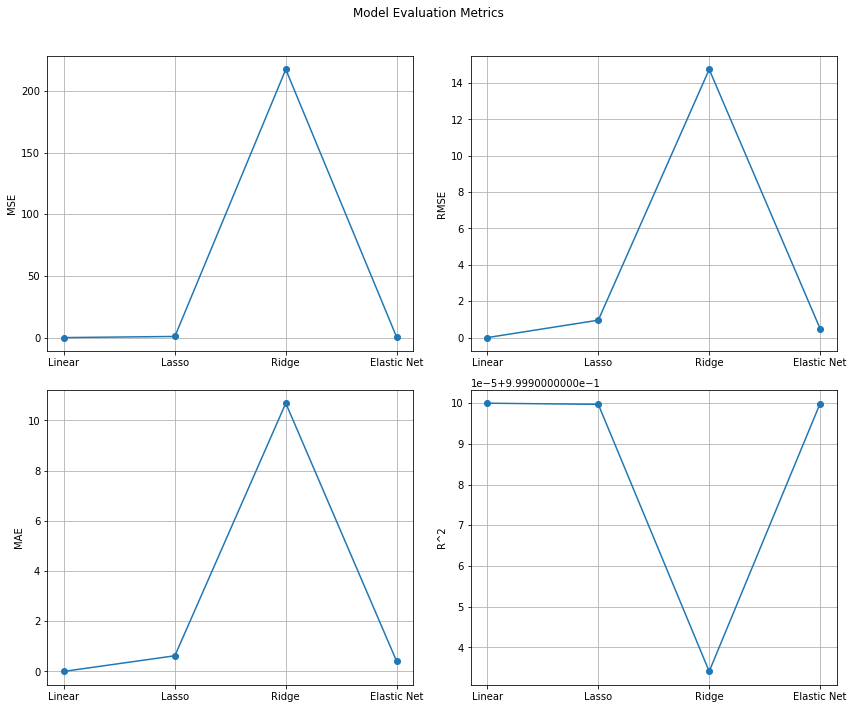

In [91]:
df_met = df_metrics.drop(columns=["Model"])
df_metrics.set_index(df_met.columns, inplace=True)

# Custom x-axis labels
custom_labels = ["Linear", "Lasso", "Ridge", "Elastic Net"]

# Plotting the metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Model Evaluation Metrics')

# Plotting Mean Squared Error (MSE)
df_metrics['Mean Squared Error (MSE)'].plot(kind='line', marker='o', ax=axes[0, 0], grid=True)
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_xticks(range(len(custom_labels)))
axes[0, 0].set_xticklabels(custom_labels)

# Plotting Root Mean Square Error (RMSE)
df_metrics['Root Mean Sqaure Error (RMSE)'].plot(kind='line', marker='o', ax=axes[0, 1], grid=True)
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticks(range(len(custom_labels)))
axes[0, 1].set_xticklabels(custom_labels)

# Plotting Mean Absolute Error (MAE)
df_metrics['Mean Absolute Error (MAE)'].plot(kind='line', marker='o', ax=axes[1, 0], grid=True)
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_xticks(range(len(custom_labels)))
axes[1, 0].set_xticklabels(custom_labels)

# Plotting R-squared (R^2)
df_metrics['R-squared (R^2)'].plot(kind='line', marker='o', ax=axes[1, 1], grid=True)
axes[1, 1].set_ylabel('R^2')
axes[1, 1].set_xticks(range(len(custom_labels)))
axes[1, 1].set_xticklabels(custom_labels)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout
plt.show()

By comparing all the 4 models (Linear, Lasso, Ridge, ElasticNet) we can see that the values of MSE, RMSE for **Linear regression** is the least and therefore a **better predictor**. We can also infer that the **R-squared value** for **Linear Regression** is the highest indicating the model can **better explain the variation of output with different inputs**(generalization of the data).

Therefore, **Linear Regression** is the optimal model here.

## Linear Regression (Best Model - Graphs)

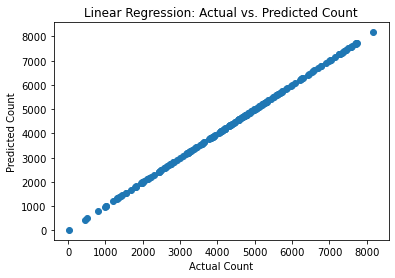

In [92]:
# Plotting Regression Graph
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Linear Regression: Actual vs. Predicted Count")
plt.show()

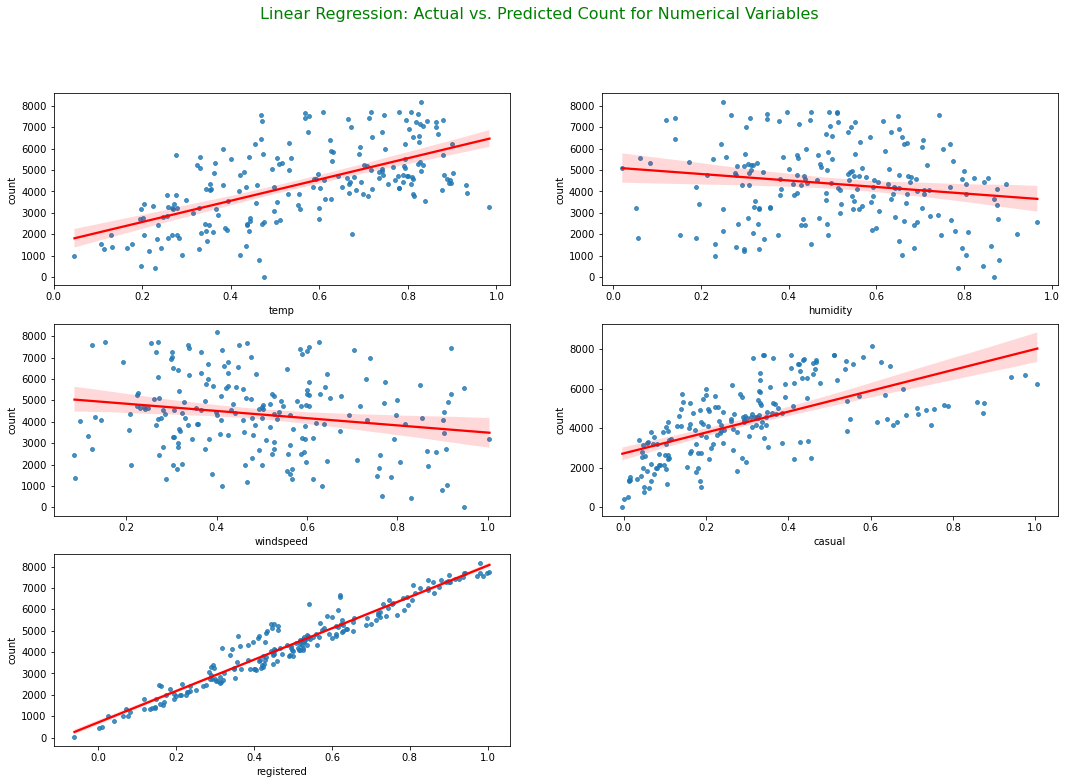

In [93]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()

plot_data = pd.DataFrame({'Actual Count': y_test, 'Predicted Count': y_pred_linear})

numerical_cols = ['temp', 'humidity', 'windspeed', 'casual', 'registered']

# Plotting individual regression plots for each numerical variable
for i, column in enumerate(numerical_cols):
    sns.regplot(x=X_test[column], y=y_test, scatter_kws={'s': 15}, line_kws={'color': 'red'}, ax=axes[i])
    plt.title(f"Linear Regression: Actual vs. Predicted Count for {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    
# Remove the empty subplot (if any)
if len(numerical_cols) < len(axes.flat):
    for j in range(len(numerical_cols), len(axes.flat)):
        fig.delaxes(axes.flatten()[j])


plt.suptitle('Linear Regression: Actual vs. Predicted Count for Numerical Variables', fontsize=16, color='Green')
plt.show()

In [94]:
# Coefficients for each feature
coefficients = lr.coef_

feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Intercept
intercept = lr.intercept_

print("\033[1mCoefficients:\033[0m")
print(sorted_coef_df)
print("\n")
print("\033[1mIntercept:\033[0m", intercept)

Coefficients:
                         Feature   Coefficient
6                     registered  6.501000e+03
5                         casual  2.281000e+03
18                     month_May  3.440803e-12
12                month_December  3.133493e-12
16                    month_June  2.540190e-12
8                  season_summer  1.966427e-12
11                  month_August  1.900702e-12
15                    month_July  1.783462e-12
7                  season_spring  1.644906e-12
20                 month_October  1.424638e-12
2                           temp  1.087130e-12
19                month_November  7.318590e-13
10                     year_2012  3.552714e-13
21               month_September  2.309264e-13
17                   month_March  1.350031e-13
28  weather_situation_Light Snow  7.105427e-15
25              weekday_Thursday -4.121148e-13
29        weather_situation_Mist -5.311307e-13
23              weekday_Saturday -7.105427e-13
27             weekday_Wednesday -7.744916e-13

From the above coefficients and intercept, we can form the **equation of the model** as follows:

count = 476.190141155349 + (registered * 6.501000e+03) + (casual * 2.281000e+03) - (holiday * 5.119014e+01) - (weekday_Monday * 5.119014e+01) - (weekday_Sunday * 5.119014e+01) - (workingday * 5.119014e+01) + (month_May * 3.440803e-12) + (month_December * 3.133493e-12) + (month_June * 2.540190e-12) + (season_summer * 1.966427e-12) + (month_August * 1.900702e-12) + (month_July *  1.783462e-12) + (season_spring * 1.644906e-12) + (month_October * 1.424638e-12) + (temp * 1.087130e-12) + (month_November *   7.318590e-13) + (year_2012  3.552714e-13) + (month_September  2.309264e-13) + (month_March  1.350031e-13) + (weather_situation_Light Snow  7.105427e-15) - (weekday_Thursday * 4.121148e-13) - (weather_situation_Mist * 5.311307e-13) - (weekday_Saturday * 7.105427e-13) - (weekday_Wednesday * 7.744916e-13) - (month_February * 1.350031e-12) - (season_winter *  1.612932e-12) - (month_January * 2.049916e-12) - (weekday_Tuesday * 2.955858e-12) - (windspeed * 3.328893e-12) - (humidity *  6.265211e-12)